In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
import csv

In [5]:
dataset = pd.read_csv('student_data.csv')

In [6]:
print(dataset.shape)
dataset.head(n=5)

(398, 26)


,visa,visa extension,send money,safe,insurance,accommodation,classmates,teachers,genaral people,police,...,corruption,education curriculum,health service,festivals,first meeting,vehicle,celebrating the own religion,sexual harassment,transport system,Response
0,1,1,0,1,0,1,1,0,0,0,...,1,0,1,1,1,0,1,0,0,0
1,1,0,1,1,0,0,1,1,1,1,...,0,1,1,1,1,0,1,1,0,1
2,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,0,1,0,1
3,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
4,0,0,0,1,0,1,1,1,1,0,...,1,0,0,0,0,0,1,1,0,0


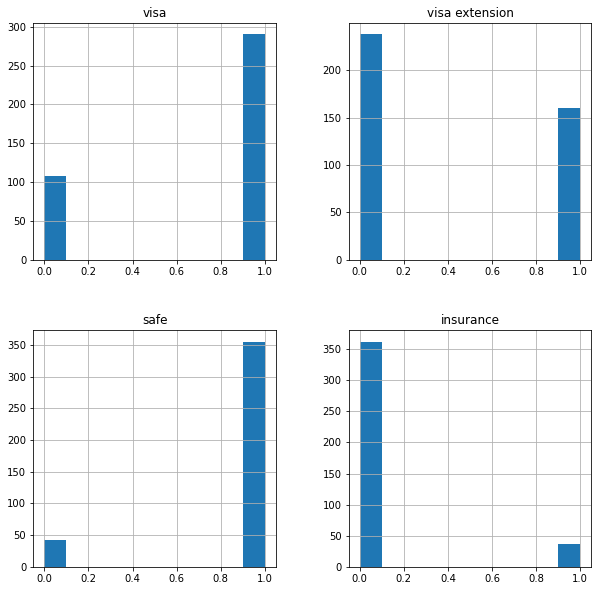

In [7]:
hist = dataset.hist(column = ["visa","visa extension","safe","insurance"],bins = 10 ,figsize =(10,10))

In [8]:
description = dataset.describe(include="all")

In [9]:
description

,visa,visa extension,send money,safe,insurance,accommodation,classmates,teachers,genaral people,police,...,corruption,education curriculum,health service,festivals,first meeting,vehicle,celebrating the own religion,sexual harassment,transport system,Response
count,398.000000,398.000000,398.00000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.728643,0.402010,0.69598,0.891960,0.090452,0.706030,0.869347,0.801508,0.778894,0.746231,...,0.743719,0.650754,0.748744,0.738693,0.713568,0.143216,0.844221,0.874372,0.489950,0.701005
std,0.445219,0.490921,0.46057,0.310822,0.287190,0.456152,0.337445,0.399367,0.415514,0.435715,...,0.437129,0.477332,0.434282,0.439900,0.452663,0.350734,0.363102,0.331847,0.500528,0.458394
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dataset.dtypes

visa                            int64
visa extension                  int64
send money                      int64
safe                            int64
insurance                       int64
accommodation                   int64
classmates                      int64
teachers                        int64
genaral people                  int64
police                          int64
tax                             int64
ATM                             int64
racial decimation               int64
food                            int64
changing climate                int64
political problem               int64
corruption                      int64
education curriculum            int64
health service                  int64
festivals                       int64
first meeting                   int64
vehicle                         int64
celebrating the own religion    int64
sexual harassment               int64
transport system                int64
Response                        int64
dtype: objec

In [11]:
for cnt in range(150): 
    dataset = shuffle(dataset)

In [12]:
dataset

,visa,visa extension,send money,safe,insurance,accommodation,classmates,teachers,genaral people,police,...,corruption,education curriculum,health service,festivals,first meeting,vehicle,celebrating the own religion,sexual harassment,transport system,Response
104,1,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
381,1,0,0,1,0,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
330,1,1,0,1,0,0,1,1,1,0,...,1,1,1,1,1,0,1,1,0,1
38,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
0,1,1,0,1,0,1,1,0,0,0,...,1,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
208,1,0,0,1,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,0,0
259,1,0,1,1,0,0,1,1,1,1,...,0,1,1,1,1,0,1,1,0,1
139,1,1,0,1,0,1,1,1,1,1,...,1,1,1,0,1,0,1,0,1,1


In [13]:
# Solit features and respose 
X = np.array(dataset.iloc[:,0:25])
Y = np.array(dataset.iloc[:,25:26])

In [14]:
print(X)

[[1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 ...
 [1 0 1 ... 1 1 0]
 [1 1 0 ... 1 0 1]
 [1 1 1 ... 1 1 1]]


In [15]:
print(Y.shape)

(398, 1)


In [16]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(5, input_shape = (25,),activation ="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid" ))

    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.6, nesterov=True)
    model.compile(loss ="binary_crossentropy", optimizer = "sgd", metrics =[ "accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
    
    print(model.summary())
    return model

In [17]:
# Cross validation 
from sklearn.model_selection import KFold
n_split = 4 
loss_list = list()
accuracy_list = list()


for train_index,test_index in KFold(n_split).split(X):
    x_train,x_test = X[train_index],X[test_index]
    y_train,y_test = Y[train_index],Y[test_index]
   
    model = create_model()
    model.fit(x_train,y_train, epochs = 300)
    result = model.evaluate(x_test,y_test)
    accuracy_list.append(result[1])
    loss_list.append(result[0])
    print(f"Model Evaluation: {result}")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 130       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________
None
Train on 298 samples
Epoch 1/300
298/298 [==============================] - 5s 15ms/sample - loss: 0.5635 - accuracy: 0.7248 - precision: 0.7336 - recall: 0.9571
Epoch 2/300
298/298 [==============================] - 0s 81us/sample - loss: 0.5488 - accuracy: 0.7349 - precision: 0.7331 - recall: 0.9810
Epoch 3/300
298/298 [==============================] - 0s 107us/sample - loss: 0.5420 - accuracy: 0.7282 - precision: 0.7247 - recall: 0.9905
Epoch 4/300
298/298 [==============================] - 0s 134us/sample

298/298 [==============================] - 0s 161us/sample - loss: 0.3993 - accuracy: 0.8255 - precision: 0.8062 - recall: 0.9905
Epoch 110/300
298/298 [==============================] - 0s 188us/sample - loss: 0.3981 - accuracy: 0.8255 - precision: 0.8062 - recall: 0.9905
Epoch 111/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3971 - accuracy: 0.8188 - precision: 0.8000 - recall: 0.9905
Epoch 112/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3961 - accuracy: 0.8221 - precision: 0.8031 - recall: 0.9905
Epoch 113/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3954 - accuracy: 0.8221 - precision: 0.8031 - recall: 0.9905
Epoch 114/300
298/298 [==============================] - 0s 161us/sample - loss: 0.3941 - accuracy: 0.8255 - precision: 0.8062 - recall: 0.9905
Epoch 115/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3929 - accuracy: 0.8255 - precision: 0.8062 - recall: 0.9905
Epoch 

Epoch 166/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3430 - accuracy: 0.8557 - precision: 0.8408 - recall: 0.9810
Epoch 167/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3425 - accuracy: 0.8624 - precision: 0.8477 - recall: 0.9810
Epoch 168/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3415 - accuracy: 0.8624 - precision: 0.8477 - recall: 0.9810
Epoch 169/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3404 - accuracy: 0.8624 - precision: 0.8477 - recall: 0.9810
Epoch 170/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3399 - accuracy: 0.8591 - precision: 0.8443 - recall: 0.9810
Epoch 171/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3385 - accuracy: 0.8624 - precision: 0.8477 - recall: 0.9810
Epoch 172/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3384 - accuracy: 0.8591 - precision: 0.8443 - recall:

Epoch 279/300
298/298 [==============================] - 0s 107us/sample - loss: 0.2615 - accuracy: 0.9128 - precision: 0.8966 - recall: 0.9905
Epoch 280/300
298/298 [==============================] - 0s 107us/sample - loss: 0.2609 - accuracy: 0.9128 - precision: 0.8966 - recall: 0.9905
Epoch 281/300
298/298 [==============================] - 0s 107us/sample - loss: 0.2603 - accuracy: 0.9027 - precision: 0.8952 - recall: 0.9762
Epoch 282/300
298/298 [==============================] - 0s 134us/sample - loss: 0.2598 - accuracy: 0.9128 - precision: 0.8966 - recall: 0.9905
Epoch 283/300
298/298 [==============================] - 0s 134us/sample - loss: 0.2592 - accuracy: 0.9094 - precision: 0.8961 - recall: 0.9857
Epoch 284/300
298/298 [==============================] - 0s 107us/sample - loss: 0.2587 - accuracy: 0.9128 - precision: 0.8966 - recall: 0.9905
Epoch 285/300
298/298 [==============================] - 0s 107us/sample - loss: 0.2580 - accuracy: 0.9094 - precision: 0.8961 - recall:

Epoch 29/300
298/298 [==============================] - 0s 134us/sample - loss: 0.5059 - accuracy: 0.7450 - precision_1: 0.7331 - recall_1: 0.9952
Epoch 30/300
298/298 [==============================] - 0s 161us/sample - loss: 0.5054 - accuracy: 0.7450 - precision_1: 0.7331 - recall_1: 0.9952
Epoch 31/300
298/298 [==============================] - 0s 134us/sample - loss: 0.5041 - accuracy: 0.7450 - precision_1: 0.7331 - recall_1: 0.9952
Epoch 32/300
298/298 [==============================] - 0s 107us/sample - loss: 0.5033 - accuracy: 0.7450 - precision_1: 0.7331 - recall_1: 0.9952
Epoch 33/300
298/298 [==============================] - 0s 134us/sample - loss: 0.5022 - accuracy: 0.7550 - precision_1: 0.7410 - recall_1: 0.9952
Epoch 34/300
298/298 [==============================] - 0s 107us/sample - loss: 0.5012 - accuracy: 0.7550 - precision_1: 0.7410 - recall_1: 0.9952
Epoch 35/300
298/298 [==============================] - 0s 134us/sample - loss: 0.5004 - accuracy: 0.7550 - precision_

298/298 [==============================] - 0s 107us/sample - loss: 0.4043 - accuracy: 0.8154 - precision_1: 0.7923 - recall_1: 0.9952
Epoch 140/300
298/298 [==============================] - 0s 134us/sample - loss: 0.4035 - accuracy: 0.8154 - precision_1: 0.7923 - recall_1: 0.9952
Epoch 141/300
298/298 [==============================] - 0s 134us/sample - loss: 0.4022 - accuracy: 0.8154 - precision_1: 0.7923 - recall_1: 0.9952
Epoch 142/300
298/298 [==============================] - 0s 134us/sample - loss: 0.4013 - accuracy: 0.8154 - precision_1: 0.7923 - recall_1: 0.9952
Epoch 143/300
298/298 [==============================] - 0s 111us/sample - loss: 0.4012 - accuracy: 0.8154 - precision_1: 0.7923 - recall_1: 0.9952
Epoch 144/300
298/298 [==============================] - 0s 134us/sample - loss: 0.4000 - accuracy: 0.8188 - precision_1: 0.8000 - recall_1: 0.9855
Epoch 145/300
298/298 [==============================] - 0s 161us/sample - loss: 0.3991 - accuracy: 0.8188 - precision_1: 0.80

298/298 [==============================] - 0s 107us/sample - loss: 0.3237 - accuracy: 0.8523 - precision_1: 0.8410 - recall_1: 0.9710
Epoch 249/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3230 - accuracy: 0.8523 - precision_1: 0.8410 - recall_1: 0.9710
Epoch 250/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3220 - accuracy: 0.8523 - precision_1: 0.8410 - recall_1: 0.9710
Epoch 251/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3219 - accuracy: 0.8523 - precision_1: 0.8410 - recall_1: 0.9710
Epoch 252/300
298/298 [==============================] - 0s 112us/sample - loss: 0.3209 - accuracy: 0.8490 - precision_1: 0.8375 - recall_1: 0.9710
Epoch 253/300
298/298 [==============================] - 0s 107us/sample - loss: 0.3200 - accuracy: 0.8523 - precision_1: 0.8410 - recall_1: 0.9710
Epoch 254/300
298/298 [==============================] - 0s 134us/sample - loss: 0.3199 - accuracy: 0.8523 - precision_1: 0.84

299/299 [==============================] - 2s 6ms/sample - loss: 0.6346 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 2/300
299/299 [==============================] - 0s 161us/sample - loss: 0.6235 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 3/300
299/299 [==============================] - 0s 161us/sample - loss: 0.6151 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 4/300
299/299 [==============================] - 0s 134us/sample - loss: 0.6080 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 5/300
299/299 [==============================] - 0s 161us/sample - loss: 0.6030 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 6/300
299/299 [==============================] - 0s 134us/sample - loss: 0.5985 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2: 1.0000
Epoch 7/300
299/299 [==============================] - 0s 161us/sample - loss: 0.5948 - accuracy: 0.6923 - precision_2: 0.6923 - recall_2:

299/299 [==============================] - 0s 134us/sample - loss: 0.4786 - accuracy: 0.7391 - precision_2: 0.7263 - recall_2: 1.0000
Epoch 112/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4780 - accuracy: 0.7425 - precision_2: 0.7289 - recall_2: 1.0000
Epoch 113/300
299/299 [==============================] - 0s 161us/sample - loss: 0.4768 - accuracy: 0.7391 - precision_2: 0.7263 - recall_2: 1.0000
Epoch 114/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4759 - accuracy: 0.7458 - precision_2: 0.7314 - recall_2: 1.0000
Epoch 115/300
299/299 [==============================] - 0s 161us/sample - loss: 0.4749 - accuracy: 0.7458 - precision_2: 0.7314 - recall_2: 1.0000
Epoch 116/300
299/299 [==============================] - 0s 161us/sample - loss: 0.4742 - accuracy: 0.7492 - precision_2: 0.7340 - recall_2: 1.0000
Epoch 117/300
299/299 [==============================] - 0s 187us/sample - loss: 0.4730 - accuracy: 0.7492 - precision_2: 0.73

299/299 [==============================] - 0s 134us/sample - loss: 0.3889 - accuracy: 0.8428 - precision_2: 0.8200 - recall_2: 0.9903
Epoch 221/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3880 - accuracy: 0.8395 - precision_2: 0.8167 - recall_2: 0.9903
Epoch 222/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3873 - accuracy: 0.8462 - precision_2: 0.8233 - recall_2: 0.9903
Epoch 223/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3866 - accuracy: 0.8361 - precision_2: 0.8135 - recall_2: 0.9903
Epoch 224/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3862 - accuracy: 0.8462 - precision_2: 0.8233 - recall_2: 0.9903
Epoch 225/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3853 - accuracy: 0.8428 - precision_2: 0.8200 - recall_2: 0.9903
Epoch 226/300
299/299 [==============================] - 0s 161us/sample - loss: 0.3844 - accuracy: 0.8428 - precision_2: 0.82

Epoch 25/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4713 - accuracy: 0.7492 - precision_3: 0.7396 - recall_3: 1.0000
Epoch 26/300
299/299 [==============================] - 0s 188us/sample - loss: 0.4694 - accuracy: 0.7492 - precision_3: 0.7396 - recall_3: 1.0000
Epoch 27/300
299/299 [==============================] - 0s 161us/sample - loss: 0.4678 - accuracy: 0.7559 - precision_3: 0.7448 - recall_3: 1.0000
Epoch 28/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4662 - accuracy: 0.7559 - precision_3: 0.7448 - recall_3: 1.0000
Epoch 29/300
299/299 [==============================] - 0s 107us/sample - loss: 0.4651 - accuracy: 0.7492 - precision_3: 0.7396 - recall_3: 1.0000
Epoch 30/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4635 - accuracy: 0.7559 - precision_3: 0.7448 - recall_3: 1.0000
Epoch 31/300
299/299 [==============================] - 0s 134us/sample - loss: 0.4617 - accuracy: 0.7559 - precision_

299/299 [==============================] - 0s 161us/sample - loss: 0.3282 - accuracy: 0.8696 - precision_3: 0.8595 - recall_3: 0.9765
Epoch 135/300
299/299 [==============================] - 0s 134us/sample - loss: 0.3270 - accuracy: 0.8729 - precision_3: 0.8631 - recall_3: 0.9765
Epoch 136/300
299/299 [==============================] - 0s 161us/sample - loss: 0.3264 - accuracy: 0.8729 - precision_3: 0.8601 - recall_3: 0.9812
Epoch 137/300
299/299 [==============================] - 0s 203us/sample - loss: 0.3257 - accuracy: 0.8662 - precision_3: 0.8474 - recall_3: 0.9906
Epoch 138/300
299/299 [==============================] - 0s 214us/sample - loss: 0.3249 - accuracy: 0.8629 - precision_3: 0.8496 - recall_3: 0.9812
Epoch 139/300
299/299 [==============================] - 0s 187us/sample - loss: 0.3238 - accuracy: 0.8729 - precision_3: 0.8601 - recall_3: 0.9812
Epoch 140/300
299/299 [==============================] - 0s 161us/sample - loss: 0.3232 - accuracy: 0.8763 - precision_3: 0.86

299/299 [==============================] - 0s 134us/sample - loss: 0.2540 - accuracy: 0.8963 - precision_3: 0.8922 - recall_3: 0.9718
Epoch 244/300
299/299 [==============================] - 0s 134us/sample - loss: 0.2535 - accuracy: 0.8963 - precision_3: 0.8922 - recall_3: 0.9718
Epoch 245/300
299/299 [==============================] - 0s 107us/sample - loss: 0.2534 - accuracy: 0.8997 - precision_3: 0.8961 - recall_3: 0.9718
Epoch 246/300
299/299 [==============================] - 0s 134us/sample - loss: 0.2529 - accuracy: 0.9030 - precision_3: 0.9000 - recall_3: 0.9718
Epoch 247/300
299/299 [==============================] - 0s 134us/sample - loss: 0.2516 - accuracy: 0.8997 - precision_3: 0.8961 - recall_3: 0.9718
Epoch 248/300
299/299 [==============================] - 0s 107us/sample - loss: 0.2513 - accuracy: 0.8963 - precision_3: 0.8922 - recall_3: 0.9718
Epoch 249/300
299/299 [==============================] - 0s 161us/sample - loss: 0.2508 - accuracy: 0.9030 - precision_3: 0.90

In [18]:
import statistics as s 
mean_accuracy = s.mean(accuracy_list)
mean_loss = s.mean(loss_list)

In [19]:
print(f"Mean Loss: {mean_loss}\tMean Accuracy: {mean_accuracy}")

Mean Loss: 0.3318073176148564	Mean Accuracy: 0.8491919040679932


In [20]:
x_test.shape
x_test

array([[1, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [21]:
y_test.shape

(99, 1)

In [22]:
y_pred = model.predict(x_test)    
res = y_pred

In [23]:
for i in range(len(y_pred)):
    if(y_pred[i] > 0.5):
        res[i] = 1
    else:
        res[i] = 0 
        

In [24]:

TP = 0 
FP = 0
FN = 0 
TN = 0
for j in range(len(y_test)):
    if(y_test[j] == 1 and res[j] == 1):
        TP = TP + 1
    elif(y_test[j] == 1 and res[j] == 0):
        FP = FP + 1
    elif(y_test[j] == 0 and res[j] == 0 ):
        TN = TN + 1
    elif(y_test[j] == 0 and res[j] == 1):
        FN = FN + 1
        
print(f"True Positive: {TP}\tFalse Positive: {FP}\tTrue Negative: {TN}\tFalse Negative: {FN}")

True Positive: 61	False Positive: 5	True Negative: 18	False Negative: 15


In [25]:
Acc = (TP+TN)/(TP+FP+TN+FN)

In [26]:
Acc

0.797979797979798

In [27]:
precision = TP/(TP+FP)
precision

0.9242424242424242

In [28]:
sensitivity = TP/(TP+FN)
sensitivity

0.8026315789473685

In [29]:
specificity = TN/(TN+FP)
specificity

0.782608695652174

In [30]:
columns = ['visa','visa extension','send money','safe','insurance','accommodation','classmates' ,'teachers','genaral people','police' ,'tax','ATM','racial decimation','food','changing climate','political problem','corruption','education curriculum','health service' ,'festivals','first meeting','vehicle','celebrating the own religion','sexual harassment','transport system']
final_data = pd.DataFrame(x_test,columns = columns)

In [31]:
final_data['Actual response'] = y_test
final_data['Predicted response'] = res
final_data

,visa,visa extension,send money,safe,insurance,accommodation,classmates,teachers,genaral people,police,...,education curriculum,health service,festivals,first meeting,vehicle,celebrating the own religion,sexual harassment,transport system,Actual response,Predicted response
0,1,0,1,1,0,1,1,1,1,1,...,1,0,1,0,1,0,1,0,1,1.0
1,0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,1,1,0,1.0
2,1,1,1,1,0,1,1,1,1,1,...,0,1,1,0,0,0,1,1,1,1.0
3,1,0,1,0,0,1,1,1,0,1,...,1,1,0,1,0,1,1,0,0,0.0
4,1,0,0,1,0,0,1,0,0,0,...,1,1,0,1,1,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,1,1,0,0,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0.0
95,1,0,0,1,0,1,1,1,1,1,...,1,1,1,0,0,0,1,0,0,1.0
96,1,0,1,1,0,0,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1.0
97,1,1,0,1,0,1,1,1,1,1,...,1,1,0,1,0,1,0,1,1,1.0


In [32]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='accommodation', ylabel='count'>

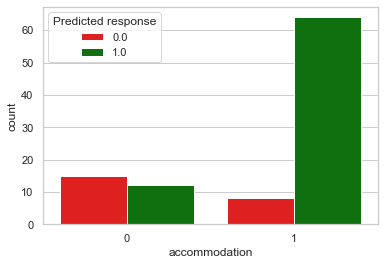

In [33]:
sns.countplot(x= "accommodation" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='teachers', ylabel='count'>

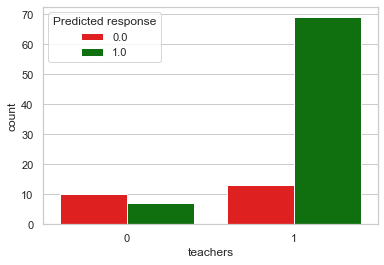

In [34]:
sns.countplot(x= "teachers" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='genaral people', ylabel='count'>

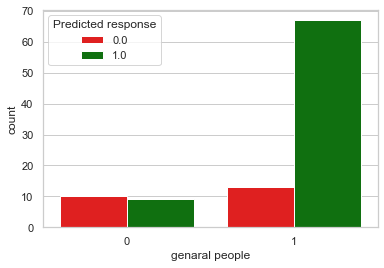

In [35]:
sns.countplot(x= "genaral people" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='racial decimation', ylabel='count'>

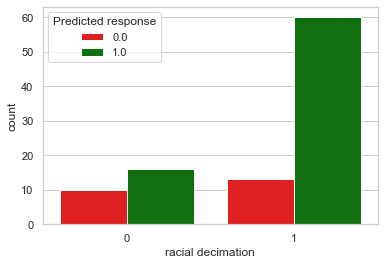

In [36]:
sns.countplot(x= "racial decimation" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='food', ylabel='count'>

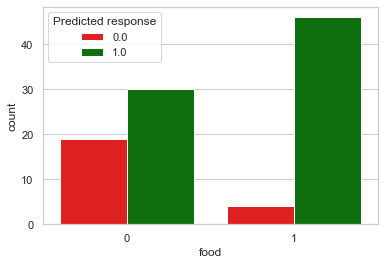

In [37]:
sns.countplot(x= "food" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='changing climate', ylabel='count'>

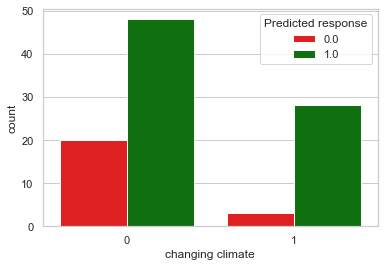

In [38]:
sns.countplot(x= "changing climate" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='political problem', ylabel='count'>

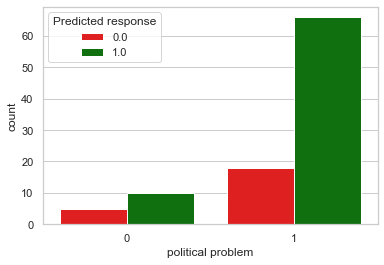

In [39]:
sns.countplot(x= "political problem" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='corruption', ylabel='count'>

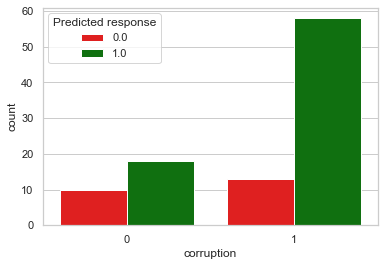

In [40]:
sns.countplot(x= "corruption" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='health service', ylabel='count'>

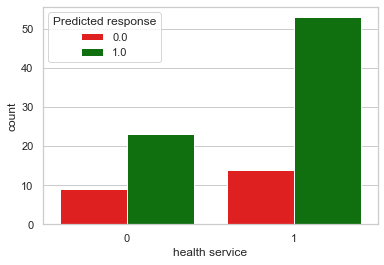

In [41]:
sns.countplot(x= "health service" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

<AxesSubplot:xlabel='sexual harassment', ylabel='count'>

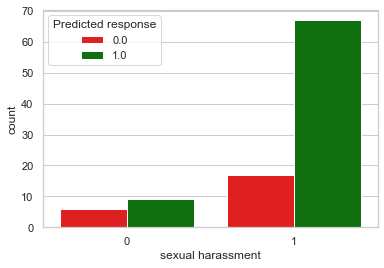

In [42]:
sns.countplot(x = "sexual harassment" , hue = "Predicted response" , data = final_data, palette=["red", "green"],saturation=0.75)

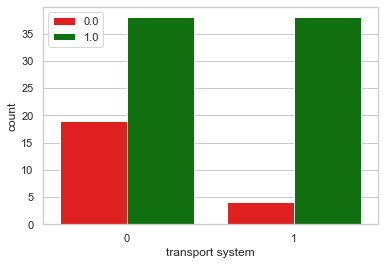

In [43]:
ts = sns.countplot(x ="transport system",orient ="v" ,hue = "Predicted response" ,  data = final_data, palette=["red", "green"],saturation=0.75)
plt.legend(loc='upper left')
